This step installs and loads fastbook

You will be prompted to sign in to a google account and get a key code


In [1]:
!pip install -Uqq fastbook


     |████████████████████████████████| 727kB 7.6MB/s 
     |████████████████████████████████| 1.2MB 15.0MB/s 
     |████████████████████████████████| 194kB 38.1MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
Mounted at /content/gdrive


In [ ]:
import fastbook
fastbook.setup_book()


Now load libraries from fastbook:

In [2]:
from fastbook import *
from fastai.vision.widgets import *

This next step allows you access directories in your google drive:

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
pwd

'/content'

In [5]:
path_handle = "/content/drive/My Drive"

In [26]:
image_directory = path_handle+"/DL_images/working_images_50"

In [27]:
os.chdir(image_directory)


Here we can see how many images are in each category:

In [32]:
ls -l africana/*.jpg | wc

     50     450    5964


In [30]:
ls -l avium/*.jpg | wc

     50     450    4976


In [35]:
ls -l americana/*.jpg | wc

     47     423    5145


In [36]:
pwd

'/content/drive/My Drive/DL_images/working_images_50'

Read in data

In [37]:
fns = get_image_files(image_directory)
fns

(#150) [Path('/content/drive/My Drive/DL_images/working_images_50/africana/africana_africana_africana_africana_1e956394-c2e5-4211-ab6c-1e32d71d7e59.jpg'),Path('/content/drive/My Drive/DL_images/working_images_50/africana/africana_africana_africana_3d08d5e5-c7d2-4aef-924e-e72da30993aa.jpg'),Path('/content/drive/My Drive/DL_images/working_images_50/africana/africana_africana_africana_9bb03d88-72f6-471a-a725-22abd237054b.jpg'),Path('/content/drive/My Drive/DL_images/working_images_50/africana/africana_africana_africana_b17161c8-9e9e-4ea8-9c76-bd388f6a8556.jpg'),Path('/content/drive/My Drive/DL_images/working_images_50/africana/africana_africana_africana_africana_b899ac71-d0b0-4459-acd9-9ecfec5a3efc.jpg'),Path('/content/drive/My Drive/DL_images/working_images_50/africana/africana_africana_africana_africana_c881987e-169b-4344-9534-d3897c434f25.jpg'),Path('/content/drive/My Drive/DL_images/working_images_50/africana/africana_africana_africana_africana_cb2211d7-1182-498c-8b58-345e0aff8d21.jpg

If too many warnings, can suppress them:

In [ ]:
#import warnings
#warnings.filterwarnings('ignore')


In [38]:
failed = verify_images(fns)
print(failed)

[]


In [18]:
failed.map(Path.unlink);

In [39]:
pilot_colab_i1 = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [40]:
dls = pilot_colab_i1.dataloaders(image_directory)

In [41]:
pilot_colab_i1 = pilot_colab_i1.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())


dls = pilot_colab_i1.dataloaders(image_directory)

In [42]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

Minimum/10: 6.92e-03, steepest point: 6.92e-04


In [49]:
learn.fine_tune(4)
learn.export('prunus_res18_pilot_colab_i1_18.pkl')


epoch,train_loss,valid_loss,error_rate,time
0,0.874872,1.270214,0.366667,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.943269,1.280312,0.366667,00:34
1,0.970869,1.208666,0.300000,00:34
2,0.875461,1.154839,0.300000,00:35
3,0.863842,1.115523,0.300000,00:34


The above should take about ~3 minutes

In [50]:
interp = ClassificationInterpretation.from_learner(learn)

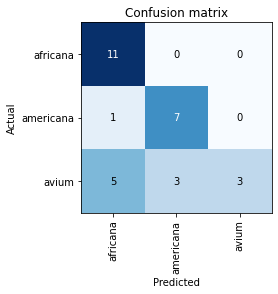

In [51]:
interp.plot_confusion_matrix()

In [52]:
#learn_imp = load_learner('/content/drive/My Drive/DL_images/prunus_res18_pilot_colab_v2a.pkl')

In [53]:
img = '/content/drive/My Drive/DL_images/yedoensis/yedoensis_76ce8c7f-5752-4b99-b851-f988f70402a4.jpg'

In [54]:
pred,pred_idx,probs = learn.predict(img)

In [55]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: avium; Probability: 0.5446')